**Compare Jedi versus Sith Centrality Measures**

In [158]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import pandas as pd
import webbrowser

os.chdir('C:\\Users\\TRADE\\Documents\\GitHub\\DATA620-Project1\\')
G = nx.read_gpickle('SW_affiliations.gpickle') #GET Bonnie's pickled Graph file of Force Alignment

#f = nx.get_node_attributes(G, 'score')  #extract the Sith/Jedi alignment scores from the nodes' first attribute (needed to combine in table below)
f = nx.get_node_attributes(G, 'alignment')

*Calculate the Centrality metrics for the Star Wars character graph:*

*Connectedness is simply a count of the number of connections this character has to other characters.*

In [159]:
#CONNECTEDNESS  
lConnections = sorted(G.degree, key=lambda x: x[1], reverse=True) #create a sorted list of characters by number of connections
d = nx.degree(G) #needed to combine in table below


*Closeness can be thought of as access efficiency. The closer a character is to another character, the more likely they will share information and may influence each other. See: *https://www.sciencedirect.com/science/article/abs/pii/S0378873315000738*

In [160]:
#CLOSENESS  calculate characters' closeness to each other
c=nx.closeness_centrality(G) #creates a dict of tuples, a=character, b=closeness  
lCloseness = [(k,v) for k,v in c.items()]  #characters and closeness as a list 
lCloseness.sort(key=lambda x: x[1], reverse=True) #sort the list by the 2nd column

*Betweenness measures others' dependence on the character. A high betweenness character supplies many other characters with information or other resources.* 

In [161]:
#BETWEENNESS  determine which characters are information brokers
b = nx.betweenness_centrality(G)
lBetween =  [(k,v) for k,v in b.items()]
lBetween.sort(key=lambda x: x[1], reverse=True)

*Eigenvector centrality is a measure of the influence a node has on a network.*
*See: https://en.wikipedia.org/wiki/Eigenvector_centrality*

In [162]:
#EIGENVECTOR CENTRALITY  determine which characters are most powerful
e = nx.eigenvector_centrality(G)
lEigen =  [(k,v) for k,v in e.items()]
lEigen.sort(key=lambda x: x[1], reverse=True)

*Now merge the four centrality measures plus the Good/Neutral/Bad classification into a single list:*

In [163]:
#Combine into one list
names1=[x[0] for x in lConnections[:100]] #get first column (character name) of Top 100 values for each metric
names2=[x[0] for x in lCloseness[:100]]
names3=[x[0] for x in lBetween[:100]]
names4=[x[0] for x in lEigen[:100]]
names = list(set(names1) | set(names2) | set(names3) | set(names4))  #make a list of distinct character names from the lists 
table=[[name, d[name], c[name], b[name], e[name], f[name]] for name in names] #join centrality measures to character names


*Arrange the data so that plots can be made comparing :*

In [164]:
#Convert data to a dataframe and give column heading names
df = pd.DataFrame(table)
df.columns = ['Name','Connectedness','Closeness','Betweenness','Eigen Centrality', 'Alignment']

*We look at the Top 100 characters in each centrality category. Then, plot the response of one category to the other:*

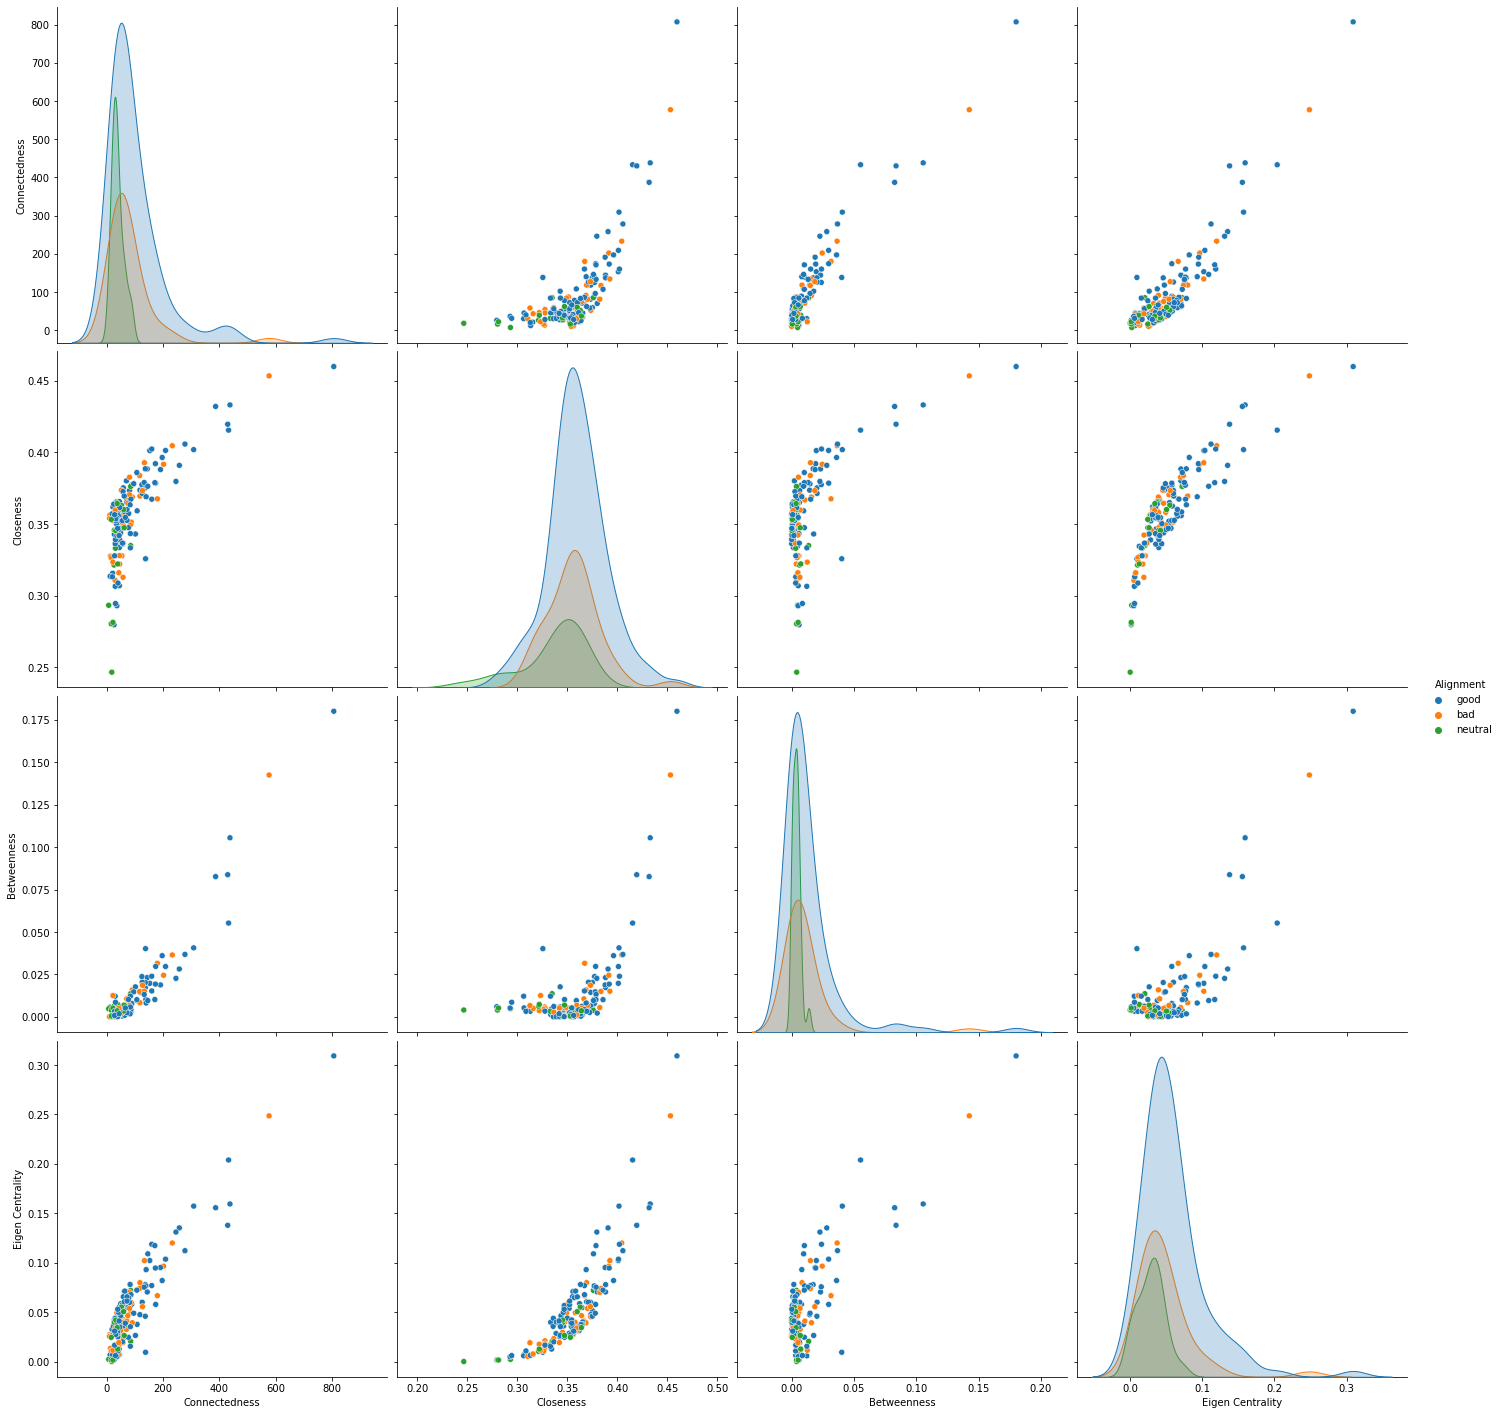

In [165]:
x = sns.pairplot(data=df, hue="Alignment", height=5)

*Notice that for all three Alignment classes: Good, Bad and Neutral, the response patterns are similar.*


*The little blue and amber dots on the top right quadrants of the centrality interaction charts above truly tell a most profound story.*
*The saga itself is the story of the life of Anakin Skywalker, born into slavery, rising as a Jedi learner, falling into the Dark Side as Vader, and eventually redeeming himself.*
*It is a story of good triumphing over evil. Let's take a closer look at those little blue and amber dots.*

*We look at the bottom left chart -* Eigenvector Centrality Vs Connectedness.
*There are two extreme outlier dots representing the two most powerful characters in the saga: Anakin Skywalker, the story's protagonist, and Darth Sidious, the chief villain:*

In [169]:
lEigen[:2]

[('Anakin_Skywalker', 0.3091087395792395),
 ('Darth_Sidious', 0.24853137909239073)]

*Through patient and cunning political intrigue, Sidious rises from being a lowly Senator from a distant and inconsequential planet, to Supreme Chancellor, the most powerful political actor in the Galaxy, giving himself emergency powers, destroying the Jedi Order and crowning himself Emperor. For a generation he is successful in suppressing freedom across the Galaxy.*

*But the network analysis tells a different story. It says that Anakin is more powerful than Sidious. It says that Sidious, while commanding masses of low-power henchman, is, in a centrality framework, surrounded by the powerful good. And this is why he is eventually overthrown.*

*The Star Wars saga is a morality fable, and the moral is that when freedom is threatened, it is not enough to be good. Good people must respond powerfully to overcome evil.*


